# Praktikum bersama

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Read Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum11/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data Preparation

In [4]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Cek Variasi Spesiesnya

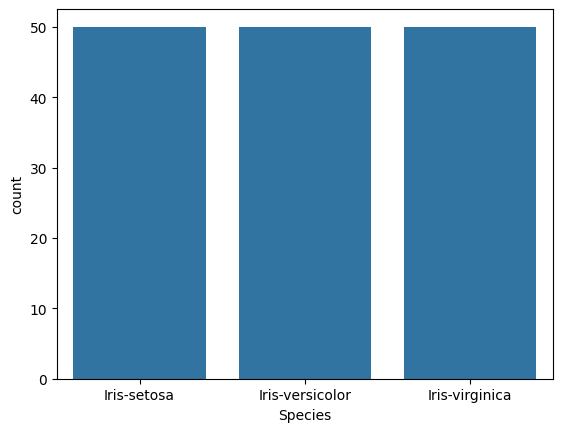

In [5]:
sns.countplot(x='Species', data=df)
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

In [7]:
# Fitur untuk clustering
X = df.drop(["Id", "Species", "SpeciesEncoded"], axis=1)

In [8]:
X[7:15]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
10,5.4,3.7,1.5,0.2
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2


Visualisasi

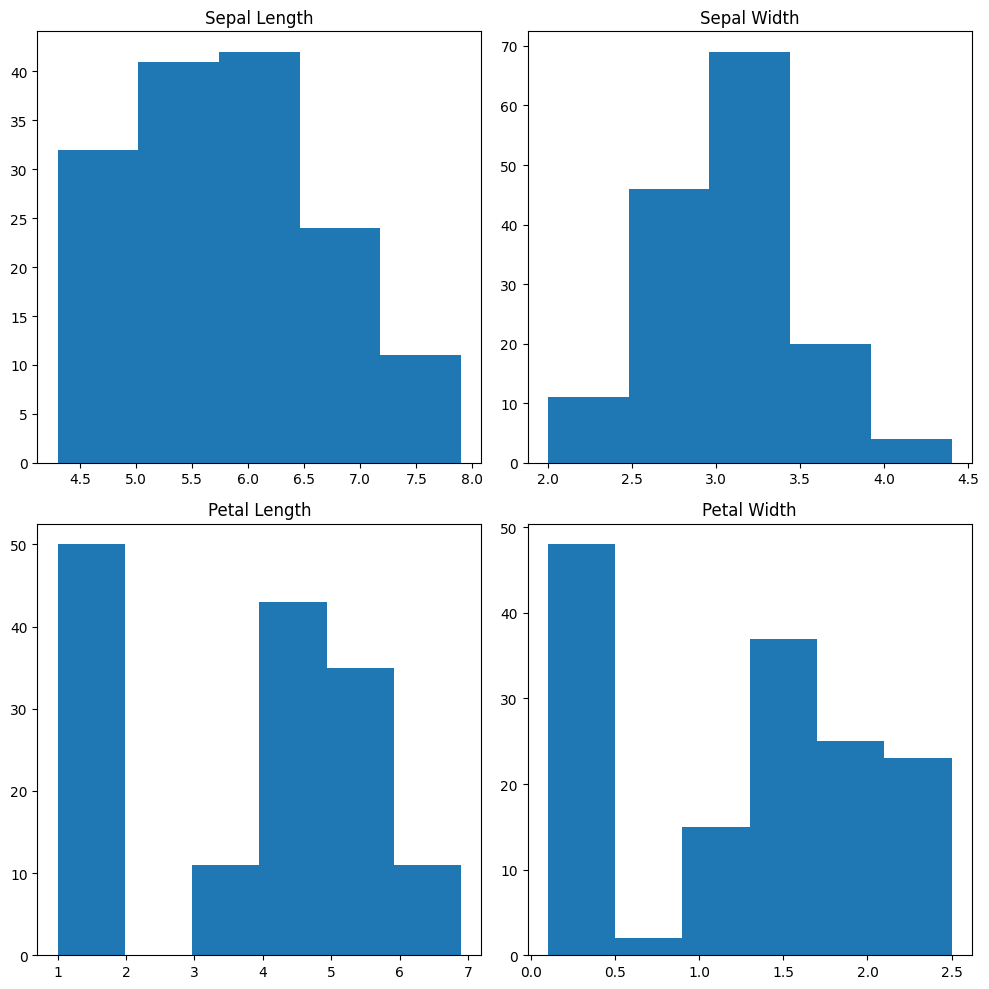

In [9]:
fig, axes = plt.subplots (2, 2, figsize=(10, 10))

# Histogram 1: Sepal Length
axes[0, 0].set_title("Sepal Length")
axes[0, 0].hist(X['SepalLengthCm'], bins=5)

# Histogram 2: Sepal Width
axes[0, 1].set_title("Sepal Width")
axes[0, 1].hist(X['SepalWidthCm'], bins=5)

# Histogram 3: Petal Length
axes[1, 0].set_title("Petal Length")
axes[1, 0].hist(X['PetalLengthCm'], bins=6)

# Histogram 4: Petal Width
axes[1, 1].set_title("Petal Width")
axes[1, 1].hist (X['PetalWidthCm'], bins=6)

plt.tight_layout()
plt.show()

Normalisasi Data

StandarScaler

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]

# Now apply the scaling
X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

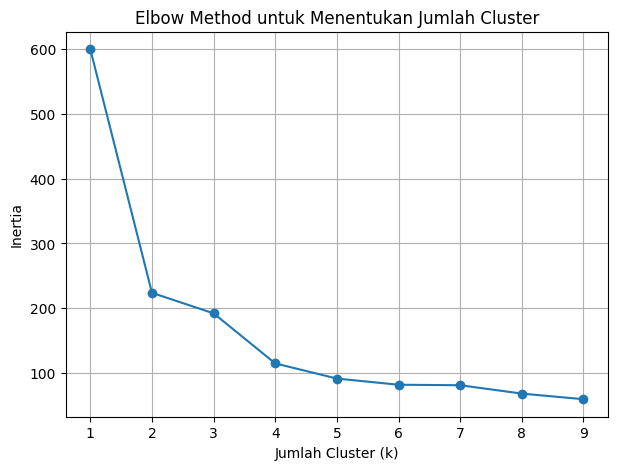

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(1, 10)

# Loop untuk menguji K-Means pada setiap nilai K
for k in K_range:
    # Inisialisasi model K-Means
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # Latih model
    km.fit(X)

    # Simpan nilai inertia (Sum of Squared Errors)
    inertia_list.append(km.inertia_)

# Plot hasil untuk metode Elbow
plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia_list, marker='o')

# Tambahkan Judul dan Label
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

Mendeklarasikan Model

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,
    n_init='auto', # Diperbaiki menjadi 'auto' (atau bilangan bulat, misal 10)
    random_state=42
)

In [13]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [14]:
labels = kmeans.predict(X)

In [15]:
df["Cluster"] = labels

In [16]:
df["Cluster"] = kmeans.fit_predict(X)
print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [1 2 0]


In [17]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["Cluster"])

print("\n ===== SILHOUETTE SCORE")
print("Silhouette Score:", sil_score)


 ===== SILHOUETTE SCORE
Silhouette Score: 0.4787241921049546


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n ===== CONFUSION MATRIX ===== ")
cm = confusion_matrix(df["SpeciesEncoded"], df["Cluster"])
print(cm)


 ===== CONFUSION MATRIX ===== 
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


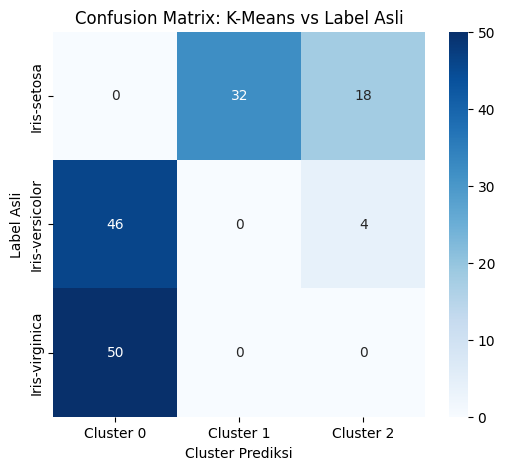

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels=le.classes_
)

plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

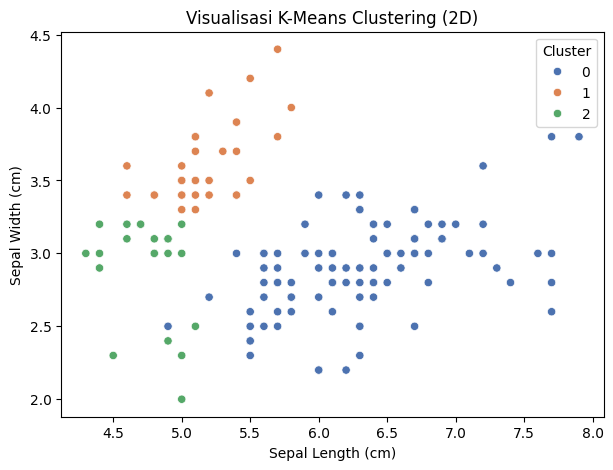

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(
x=df["SepalLengthCm"],
y=df["SepalWidthCm"],
hue=df["Cluster"],
palette="deep"
)

plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

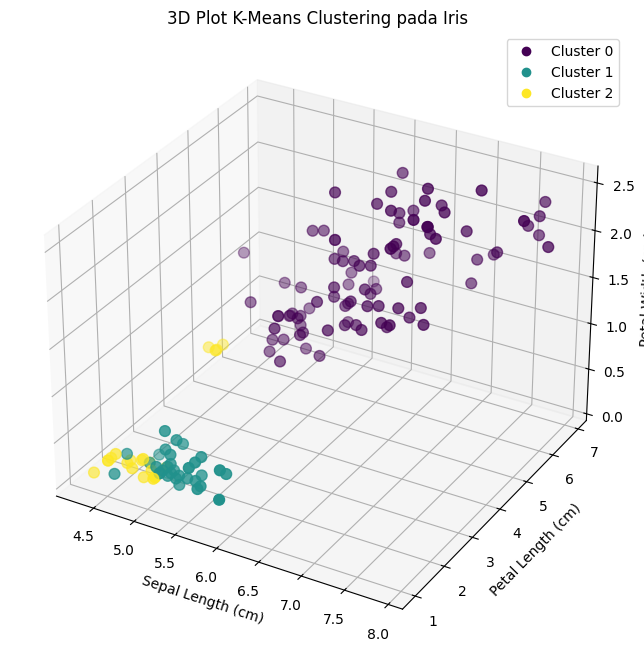

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    df["PetalWidthCm"],
    c=df["Cluster"],
    s=60
)

ax.set_title("3D Plot K-Means Clustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")

# Legend cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

# Praktikum Mandiri

Rancangan Kode Praktikum DBSCAN (Data Gempa Bumi)

Import Library

In [24]:
# 1. Instalasi Library Tambahan (Folium & Contextily untuk Pemetaan)
# Pastikan Anda menjalankan ini di environment yang mendukung command `!pip`
!pip install folium
!pip install contextily
!pip install plotly # Untuk visualisasi interaktif

# 2. Import Library Utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium # Untuk peta interaktif
import contextily as cx # Untuk basemap pada peta
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px

Loading Dataset & Data Cleaning

In [26]:
# 3. Loading Dataset
# Pastikan file 'katalog_gempa.csv' berada di direktori yang benar (lokal)
# Jika di Kaggle, gunakan jalur input Kaggle
data = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum11/data/katalog_gempa.csv')

print("Informasi Dataset Awal:")
data.info()
print("\n5 Data Teratas:")
print(data.head())

Informasi Dataset Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB

5 Data Teratas:
          tgl            ot   lat     lon  depth  mag  \
0  2008/11/01  21:02:43.058 -9.18  119.06     10  4.9   
1  2008/11/01  20:58:50.248 -6.55  129.64     10  4.6   
2  2008/11/01  17:43:12.941 -7.01  106.63    12

In [28]:
# 4. Data Cleaning (Pembersihan Data)

# Inisialisasi variabel nama kolom sesuai data Anda
LATITUDE_COL = 'lat'
LONGITUDE_COL = 'lon'
MAGNITUDE_COL = 'mag'
DEPTH_COL = 'depth' # Tambahkan Depth untuk analisis cluster

# Cek Missing Values di kolom kunci ('lat', 'lon', 'mag')
print("\nCek Missing Values:")
# Menggunakan nama kolom yang benar: 'lat', 'lon', 'mag'
print(data[[LATITUDE_COL, LONGITUDE_COL, MAGNITUDE_COL, DEPTH_COL]].isnull().sum())

# Jika ada nilai hilang pada kolom kunci, hapus baris tersebut
# Berdasarkan info Anda, kolom ini sudah Non-Null, tapi tetap dilakukan untuk keamanan.
data.dropna(subset=[LATITUDE_COL, LONGITUDE_COL, MAGNITUDE_COL, DEPTH_COL], inplace=True)
data.reset_index(drop=True, inplace=True)

# Verifikasi data setelah cleaning
print(f"\nJumlah data setelah cleaning: {len(data)}")
print(data.head())


Cek Missing Values:
lat      0
lon      0
mag      0
depth    0
dtype: int64

Jumlah data setelah cleaning: 92887
          tgl            ot   lat     lon  depth  mag  \
0  2008/11/01  21:02:43.058 -9.18  119.06     10  4.9   
1  2008/11/01  20:58:50.248 -6.55  129.64     10  4.6   
2  2008/11/01  17:43:12.941 -7.01  106.63    121  3.7   
3  2008/11/01  16:24:14.755 -3.30  127.85     10  3.2   
4  2008/11/01  16:20:37.327 -6.41  129.54     70  4.3   

                     remark  strike1  dip1  rake1  strike2  dip2  rake2  
0  Sumba Region - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
1                 Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  
2          Java - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
3         Seram - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
4                 Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  


Exploratory Data Analysis (EDA) Spasial

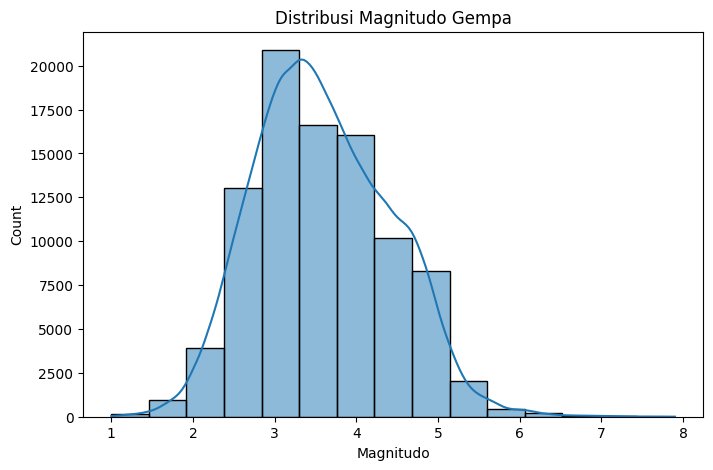

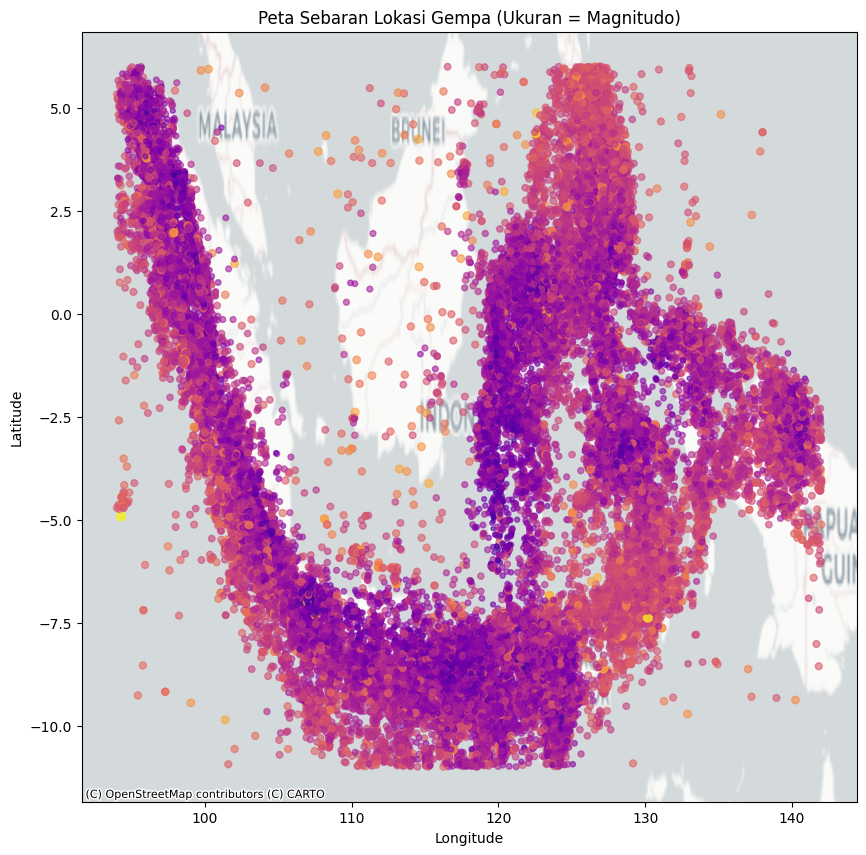

In [29]:
# Menunjukkan sebaran kekuatan gempa
plt.figure(figsize=(8, 5))
sns.histplot(data[MAGNITUDE_COL], kde=True, bins=15)
plt.title('Distribusi Magnitudo Gempa')
plt.xlabel('Magnitudo')
plt.show()

# 5.2. Peta Sebaran Lokasi Gempa dengan Basemap (Menggunakan Matplotlib + Contextily)
# Visualisasi sederhana lokasi gempa
plt.figure(figsize=(10, 10))
plt.scatter(data[LONGITUDE_COL], data[LATITUDE_COL],
            s=data[MAGNITUDE_COL] * 5, # Ukuran titik berdasarkan Magnitude
            alpha=0.6,
            c=data[MAGNITUDE_COL],
            cmap='plasma')
cx.add_basemap(plt.gca(), crs='EPSG:4326', source=cx.providers.CartoDB.Positron)
plt.title('Peta Sebaran Lokasi Gempa (Ukuran = Magnitudo)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Analisis Korelasi & Normalisasi Data

--- Tahap 6: Uji Normalitas (Dilewati) ---

--- Tahap 7: Analisis Matriks Korelasi Spearman ---


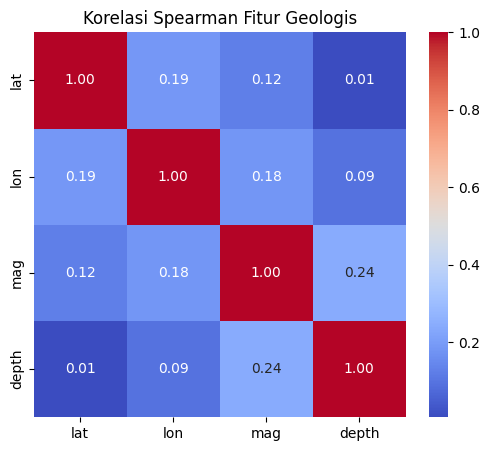


--- Tahap 8: Analisis Korelasi Spesifik (Depth vs Magnitude) ---


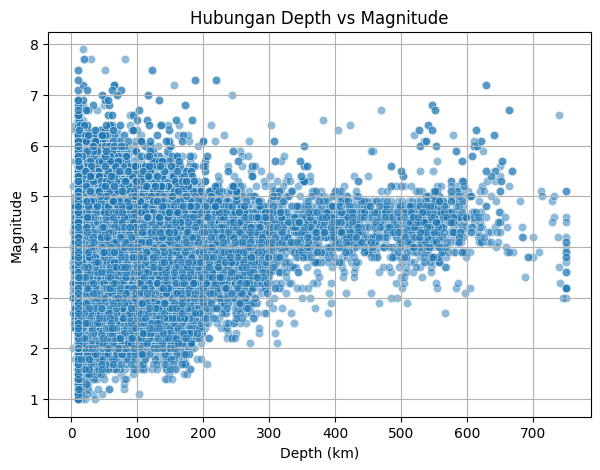


--- Tahap 9: Normalisasi Data ---
Fitur yang dipilih untuk clustering: ['lat', 'lon']

Data Koordinat Setelah RobustScaler (5 baris teratas):
        lat       lon
0 -0.781308 -0.152950
1 -0.453583  0.617626
2 -0.510903 -1.058267
3 -0.048598  0.487254
4 -0.436137  0.610342


In [31]:
# --- Tahap 7, 8, dan 9 (Kode sudah dikoreksi menggunakan DEPTH_COL / 'depth') ---

# 6. Uji Normalitas (Opsional: Kita lewati)
print("--- Tahap 6: Uji Normalitas (Dilewati) ---")

# 7. Analisis Matriks Korelasi (Spearman Correlation)
# Korelasi antar fitur numerik (Latitude, Longitude, Magnitude, Depth)
# KOREKSI: Menggunakan variabel DEPTH_COL ('depth')
print("\n--- Tahap 7: Analisis Matriks Korelasi Spearman ---")
numeric_corr = data[[LATITUDE_COL, LONGITUDE_COL, MAGNITUDE_COL, DEPTH_COL]].corr(method='spearman')

plt.figure(figsize=(6, 5))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Spearman Fitur Geologis')
plt.show()

# 8. Analisis Korelasi Spesifik: Depth vs Magnitude (Pengganti IPM vs Umur Harapan Hidup)
# Visualisasi kedalaman gempa vs kekuatannya
# KOREKSI: Menggunakan variabel DEPTH_COL ('depth') pada sumbu X
print("\n--- Tahap 8: Analisis Korelasi Spesifik (Depth vs Magnitude) ---")
plt.figure(figsize=(7, 5))
sns.scatterplot(x=DEPTH_COL, y=MAGNITUDE_COL, data=data, alpha=0.5)
plt.title('Hubungan Depth vs Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


# 9. Normalisasi Data
print("\n--- Tahap 9: Normalisasi Data ---")

# 9.1. Pemilihan Kolom untuk Normalisasi (Hanya Koordinat)
# Hanya 'lat' dan 'lon' yang digunakan untuk DBSCAN Spasial
features_to_cluster = [LATITUDE_COL, LONGITUDE_COL]
X = data[features_to_cluster]
print(f"Fitur yang dipilih untuk clustering: {features_to_cluster}")

# 9.2. Proses Normalisasi dengan RobustScaler
# RobustScaler cocok untuk data spasial yang mungkin memiliki outlier ekstrem
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features_to_cluster)
print("\nData Koordinat Setelah RobustScaler (5 baris teratas):")
print(X_scaled_df.head())

Menentukan Parameter $\epsilon$ (Epsilon) menggunakan K-Distance Graph

--- Tahap 10: Menentukan Parameter ε (Epsilon) ---


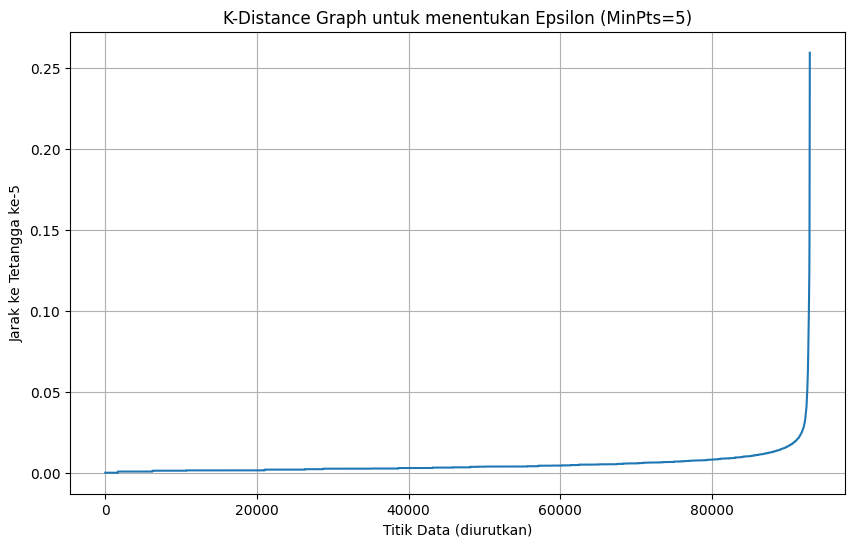


Instruksi: Amati grafik di atas. Nilai Y pada titik 'siku' (elbow) adalah estimasi ε optimal.


In [32]:
# --- Tahap 10: Menentukan Parameter ε (epsilon) menggunakan K-Distance Graph ---
print("--- Tahap 10: Menentukan Parameter ε (Epsilon) ---")

# MinPts: Kita gunakan nilai umum MinPts = 5 (untuk data 2D/3D)
min_samples_value = 5

# Menghitung jarak ke tetangga terdekat ke-(MinPts)
# Kita menggunakan data yang sudah di-scaling (X_scaled)
nn = NearestNeighbors(n_neighbors=min_samples_value).fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

# Ambil kolom jarak ke tetangga ke-MinPts (indeks ke-MinPts - 1)
distances = np.sort(distances[:, min_samples_value-1], axis=0)

# Plot K-Distance Graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title(f'K-Distance Graph untuk menentukan Epsilon (MinPts={min_samples_value})')
plt.xlabel('Titik Data (diurutkan)')
plt.ylabel(f'Jarak ke Tetangga ke-{min_samples_value}')
plt.grid(True)
plt.show()


print("\nInstruksi: Amati grafik di atas. Nilai Y pada titik 'siku' (elbow) adalah estimasi ε optimal.")

(Clustering DBSCAN) yang Disesuaikan

In [33]:
# --- Tahap 11: Clustering dengan DBSCAN ---
print("\n--- Tahap 11: Clustering dengan DBSCAN ---")

# 1. Tentukan MinPts (dari Langkah 10)
min_samples_value = 5

# 2. Nilai Epsilon Optimal (Disesuaikan dari analisis grafik K-Distance)
# Nilai 0.02 dipilih karena berada di titik 'siku' (elbow) pada grafik Anda.
eps_optimal = 0.02

# Inisialisasi dan Terapkan Model
# Model DBSCAN dijalankan pada data koordinat yang sudah di-scaling (X_scaled)
dbscan = DBSCAN(eps=eps_optimal, min_samples=min_samples_value)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

print(f"DBSCAN dijalankan dengan ε={eps_optimal} dan MinPts={min_samples_value}")

# Hasil Sebaran Cluster:
# Label -1 adalah Noise/Outlier (gempa yang sangat terisolasi)
print("\nHasil Sebaran Cluster:")
print(data['DBSCAN_Cluster'].value_counts().sort_index())


--- Tahap 11: Clustering dengan DBSCAN ---
DBSCAN dijalankan dengan ε=0.02 dan MinPts=5

Hasil Sebaran Cluster:
DBSCAN_Cluster
-1      1064
 0     84312
 1      6162
 2         7
 3        17
       ...  
 68        7
 69        8
 70        6
 71       10
 72        6
Name: count, Length: 74, dtype: int64


(Evaluasi & Visualisasi)

In [34]:
# --- Tahap 12: Evaluasi Kualitas Clustering menggunakan Silhouette Score ---
print("\n--- Tahap 12: Evaluasi Kualitas Clustering ---")

# Filter data: Hapus noise (label -1)
X_no_noise = X_scaled[data['DBSCAN_Cluster'] != -1]
labels_no_noise = data['DBSCAN_Cluster'][data['DBSCAN_Cluster'] != -1]

# Cek apakah ada lebih dari satu cluster yang valid (selain noise)
if len(np.unique(labels_no_noise)) > 1:
    silhouette_avg = silhouette_score(X_no_noise, labels_no_noise)
    print(f"\nSilhouette Score (Excluding Noise): {silhouette_avg:.4f}")
else:
    print("\nTidak ada cukup cluster (>1) selain noise untuk menghitung Silhouette Score.")


--- Tahap 12: Evaluasi Kualitas Clustering ---

Silhouette Score (Excluding Noise): -0.7672


Visualisasi Hasil Clustering (2D Peta)


--- Tahap 13: Visualisasi Hasil Clustering di Peta ---


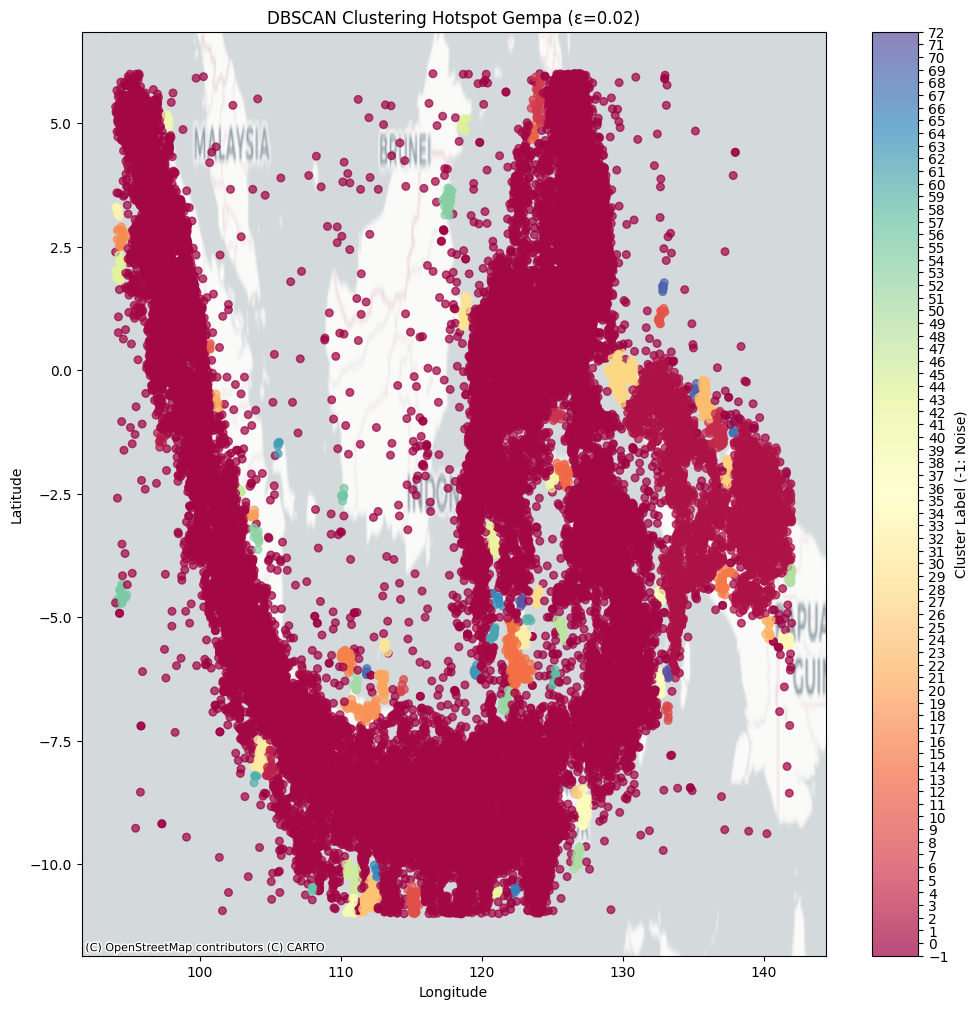

In [35]:
# --- Tahap 13: Visualisasi Hasil Clustering di Peta 2D (menggunakan Matplotlib & Contextily) ---
print("\n--- Tahap 13: Visualisasi Hasil Clustering di Peta ---")

plt.figure(figsize=(12, 12))
scatter = plt.scatter(data[LONGITUDE_COL], data[LATITUDE_COL],
                      c=data['DBSCAN_Cluster'],
                      cmap='Spectral', # Skema warna untuk membedakan cluster
                      s=30, # Ukuran titik
                      alpha=0.7)

# Tambahkan basemap untuk konteks geografis
# Perhatikan bahwa contextily mungkin memerlukan instalasi tambahan: !pip install contextily
try:
    cx.add_basemap(plt.gca(), crs='EPSG:4326', source=cx.providers.CartoDB.Positron)
except Exception as e:
    print(f"Warning: Contextily failed to load basemap. Displaying scatter plot only. Error: {e}")

plt.title(f'DBSCAN Clustering Hotspot Gempa (ε={eps_optimal})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter, ticks=np.unique(data['DBSCAN_Cluster']), label='Cluster Label (-1: Noise)')
plt.show()

Analisis Kualitatif & Ringkasan Cluster

In [36]:
# --- Tahap 14 & 15: Analisis Kualitatif & Ringkasan Cluster (Cluster Summary) ---
print("\n--- Tahap 14 & 15: Ringkasan & Profil Cluster ---")

# Hitung rata-rata fitur (termasuk Magnitude dan Depth) untuk setiap cluster yang valid
cluster_summary = data[data['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[
    [LATITUDE_COL, LONGITUDE_COL, MAGNITUDE_COL, DEPTH_COL]
].mean()

print("\nRingkasan Profil Setiap Cluster (Rata-rata Geografis, Magnitudo, & Kedalaman):")
print(cluster_summary.round(2))

# 14. Pengelompokan Kualitatif Cluster
print("\nInterpretasi Kualitatif:")
# Berdasarkan output di atas (misalnya, cluster dengan rata-rata 'mag' tertinggi)
# Anda dapat memberikan label seperti:
# Cluster X: "Zona Gempa Dangkal & Magnitudo Tinggi"
# Cluster Y: "Zona Gempa Laut Dalam"


--- Tahap 14 & 15: Ringkasan & Profil Cluster ---

Ringkasan Profil Setiap Cluster (Rata-rata Geografis, Magnitudo, & Kedalaman):
                 lat     lon   mag   depth
DBSCAN_Cluster                            
0              -3.47  117.83  3.56   49.65
1              -2.43  137.08  3.84   25.54
2              -1.41   97.22  4.57   35.86
3              -8.02  104.98  4.31   38.76
4              -1.28  136.80  4.11   23.59
...              ...     ...   ...     ...
68             -6.12  111.84  5.96  528.86
69              1.68  132.87  5.20   17.62
70             -0.41  135.15  4.28   14.50
71             -4.69  122.84  3.56   10.60
72             -6.14  133.23  4.45   59.50

[73 rows x 4 columns]

Interpretasi Kualitatif:


Visualisasi Interaktif

In [37]:
# --- Tahap 16: Visualisasi Interaktif Persebaran Cluster (Plotly 3D) ---
print("\n--- Tahap 16: Visualisasi Interaktif (Plotly) ---")

# Opsi: Peta 3D (X=Longitude, Y=Latitude, Z=Magnitude)
fig = px.scatter_3d(
    data,
    x=LONGITUDE_COL,
    y=LATITUDE_COL,
    z=MAGNITUDE_COL,
    color=data['DBSCAN_Cluster'].astype(str), # Warna berdasarkan Cluster
    title='DBSCAN Clustering 3D (Lokasi & Magnitudo)',
    labels={'x': 'Longitude', 'y': 'Latitude', 'z': 'Magnitude'},
    opacity=0.8
)
fig.show()


--- Tahap 16: Visualisasi Interaktif (Plotly) ---
